In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [36]:
# 그래프에서 선의 종류
linestyles = ['-', '--', ':']

def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g= lambda x:x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set,f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability {prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance : {V(X):.4}')
    
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label = 'prob')
    ax.vlines(E(X), 0,1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

1. 베르누이 분포

In [37]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

Bern(0.3)을 따르는 확률변수 X 작성

In [38]:
p = 0.3
X = Bern(p)

In [40]:
# 기댓값과 분산 계산
# 기댓값 : 0.3, 분산 : 0.3 * 0.7

check_prob(X)

expected value 0.3
variance : 0.21


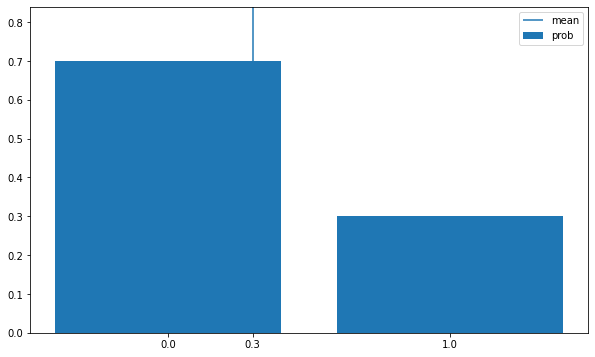

In [42]:
# 확률변수 X 그리기 (중앙 세로선이 기댓값)

plot_prob(X)

In [43]:
rv = stats.bernoulli(p)

In [44]:
# 0의 값을 취할 확률, 1의 값을 취할 확률
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [45]:
rv.pmf([0,1])

array([0.7, 0.3])

In [46]:
# 누적 밀도 함수 계산
rv.cdf([0,1])

array([0.7, 1. ])

In [47]:
rv.mean(), rv.var()

(0.300, 0.210)

2. 이항분포 : 성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수ㅏ 따르는 분포, 성공하는 횟수는 0번부터 n번까지 이므로 확률변수가 취할 수 있는 값은 {0,1...n} 이다.

In [48]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p) ** (n-x)
        else:
            return 0
    return x_set, f

In [49]:
n = 10
p = 0.3
X = Bin(n,p)

In [50]:
check_prob(X)

expected value 3.0
variance : 2.1


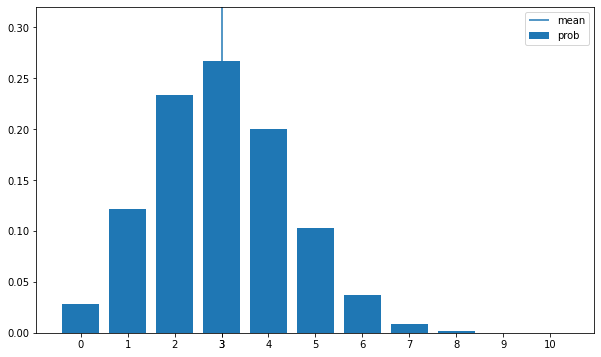

In [52]:
plot_prob(X)

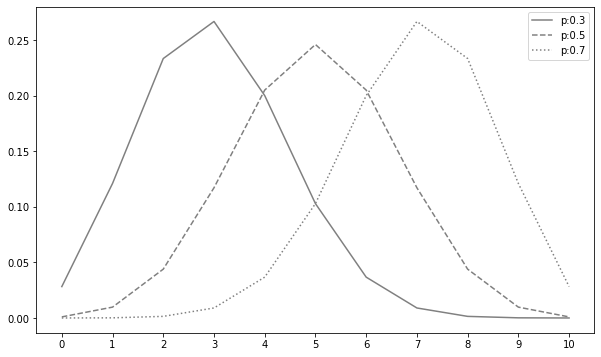

In [53]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
    
ax.set_xticks(x_set)
ax.legend()

plt.show()

p가 커질수록, 정상이 되는 값이 커진다. 또한 p = 0.5 일 때, 좌우대칭 형태로 분포하고 p = 0.3과 p=0.7이 대칭 관계에 있다는 것을 알 수 있다.

3. 기하분포 : 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포이다. 기하분포는 첫 번쨰 성공하는 경우가 있으면 연달아 실패할 수 있기 때문에 확률변수가 취할 수 있는 값은 1 이상인 정수 전체 {1,2..}가 된다. 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 된다.

In [54]:
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
        
    return x_set, f

In [55]:
p = 0.5
X = Ge(p)

In [56]:
check_prob(X)

expected value 2.0
variance : 2.0


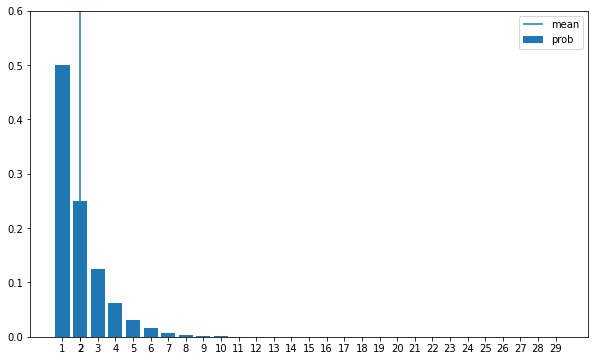

In [57]:
plot_prob(X)

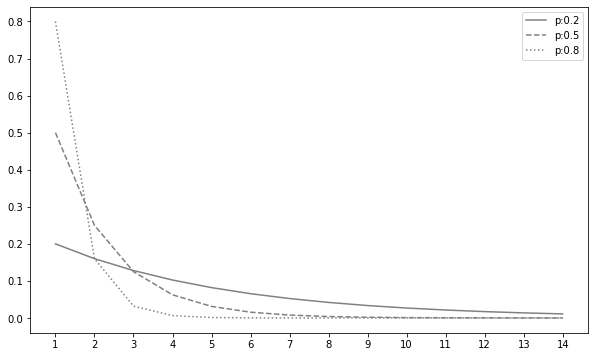

In [59]:
# scipy 모듈을 사용한 기하분포

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p) 
    ax.plot(x_set, rv.pmf(x_set), 
            label=f"p:{p}", ls=ls, color='gray') 
ax.set_xticks(x_set)
ax.legend()

plt.show()      

4. 포아송 분포 : 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이다.

In [60]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
        
    return x_set, f

In [61]:
lam = 3
X = Poi(lam)

In [62]:
check_prob(X)

expected value 3.0
variance : 3.0


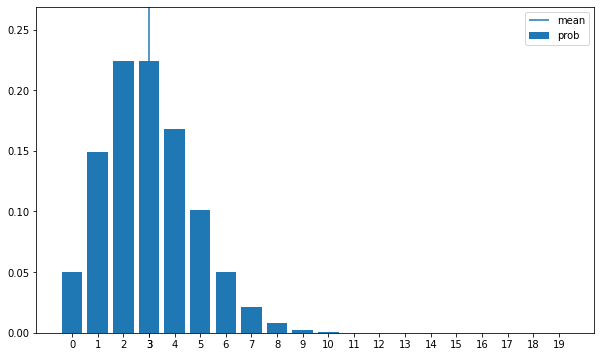

In [63]:
plot_prob(X)

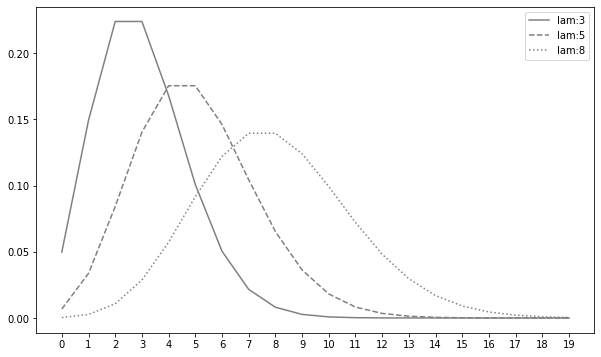

In [64]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3,5,8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()